# Unsupervised Learning Final Project: Credit Card Customer Clustering

For this project I'll be using a dataset about credit card purchases that seems to have a significant number of features and rows. 
The dataset contains different data columns for unique customers and is meant to be used to explore customer card u

The primary objective is to apply and compare multiple unsupervised learning models:
- *K-Means* clustering on both the full feature set and on PCA-reduced data
- *Principal* Component Analysis (PCA) for dimensionality reduction and visualization
- *Hierarchical Clustering* on the PCA-transformed dataset

We will build three models:
- K-means with the full, non PCA processed data
- K-means with PCA reduced data
- Hierarchical Clustering with PCA reduced data



## Data loading and EDA

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CC GENERAL.csv')

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<Axes: >

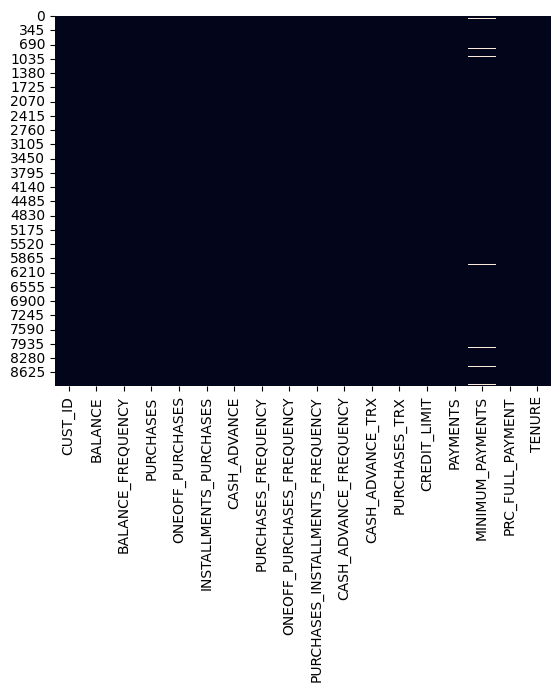

In [9]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

It looks like there's some null values we will need to clean up for MINIMUM_PAYMENTS and CREDIT_LIMIT. All the other columns are complete so it's not a big loss.

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

It looks like there's no constant or near constant features, this is good.

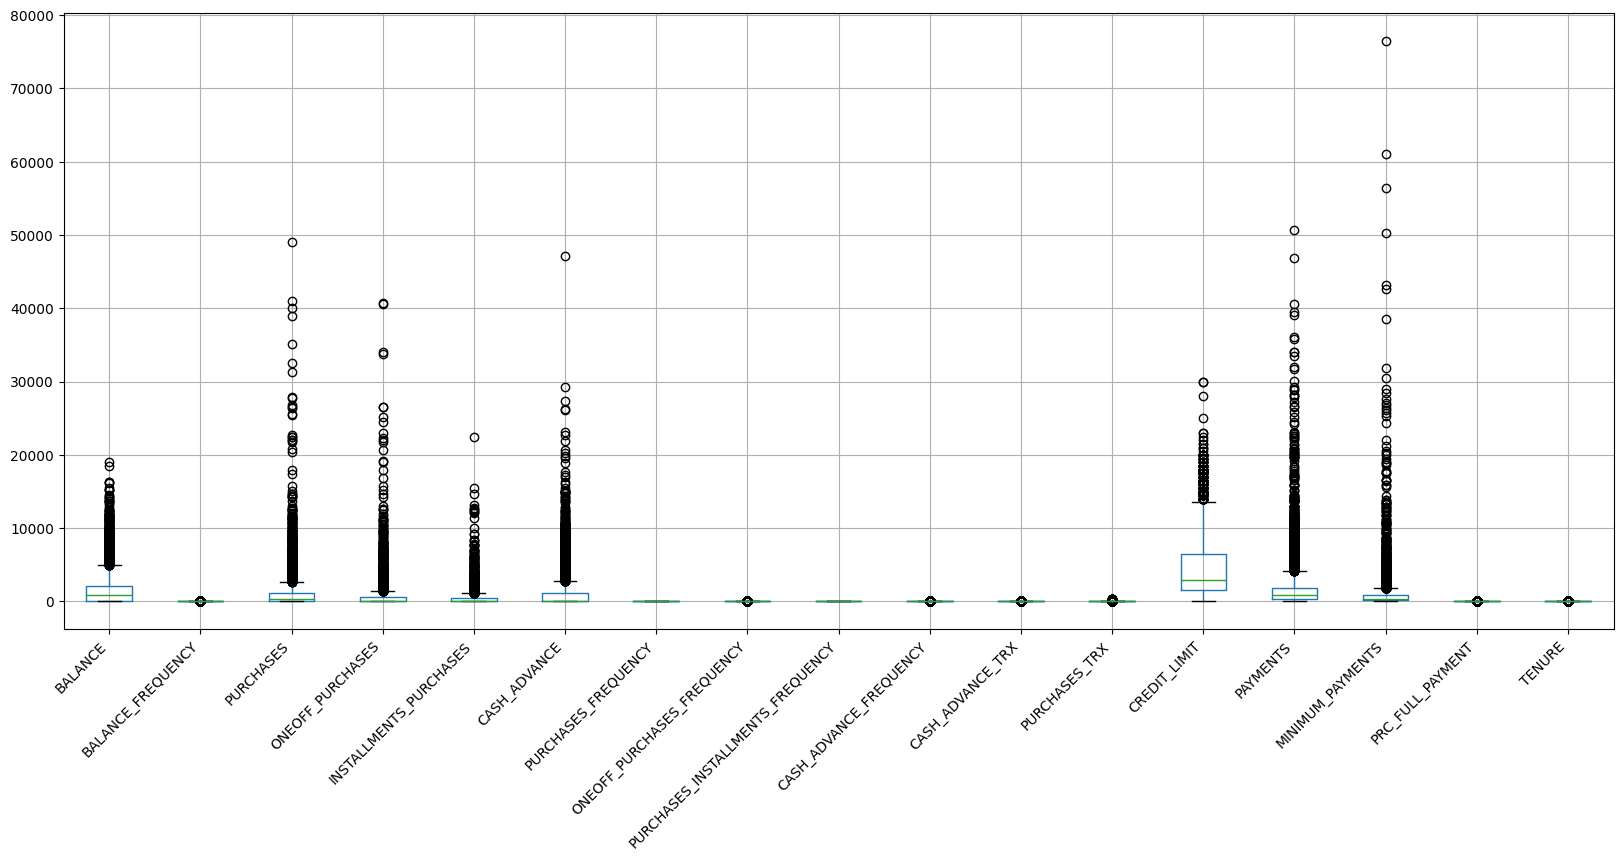

In [21]:
df.boxplot(figsize=(20,8))
_ = plt.xticks(rotation=45, ha="right")

There are some clearly visible outliers in a lot of these columns, we will have to clean those up because K-means is really easily skewed by values that are way out of range.
The ranges for some of these columns seem to be very small, that makes it really hard to visualize outliers, so we'll plot them separately to get a better insight.

<Axes: >

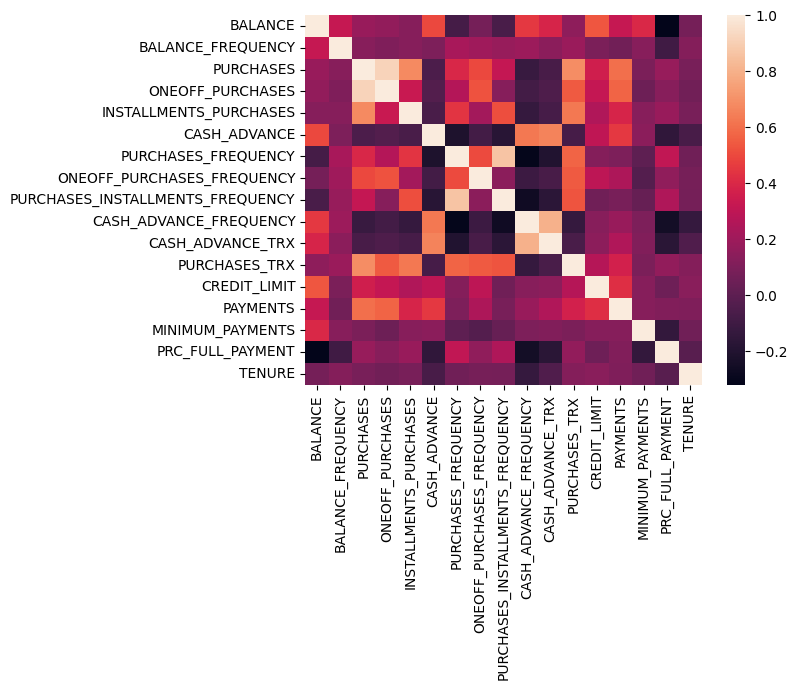

In [17]:
# dropping the cust_id column, we won't need that.
df.drop(columns=["CUST_ID"],inplace=True,errors="ignore")

corr = df.corr()
sns.heatmap(corr)

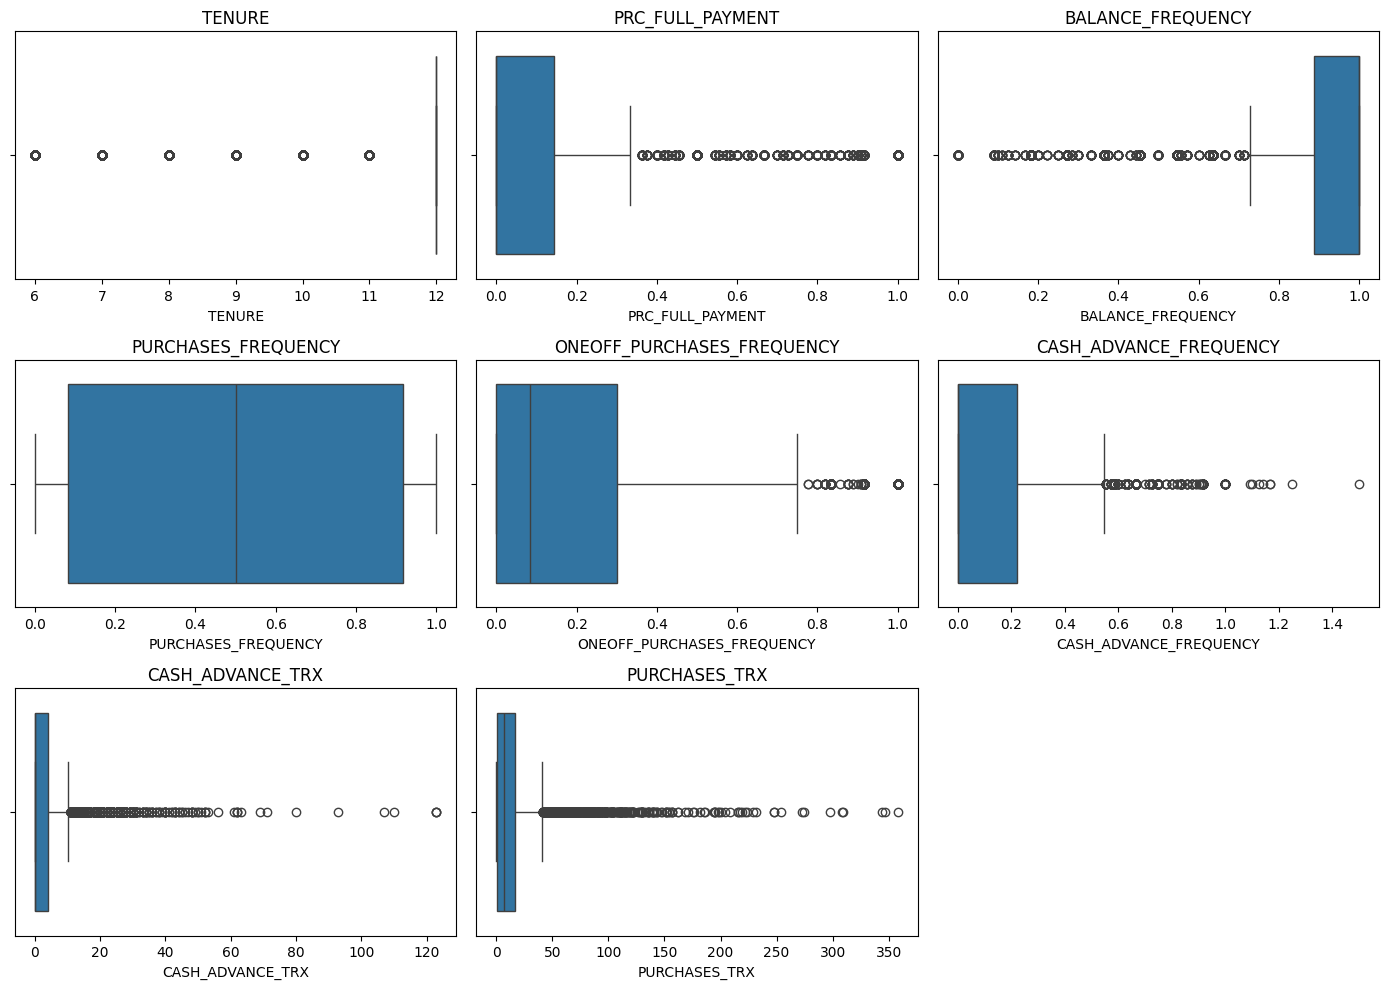

In [18]:
small_cols = [
    'TENURE', 
    'PRC_FULL_PAYMENT', 
    'BALANCE_FREQUENCY',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX'
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(small_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

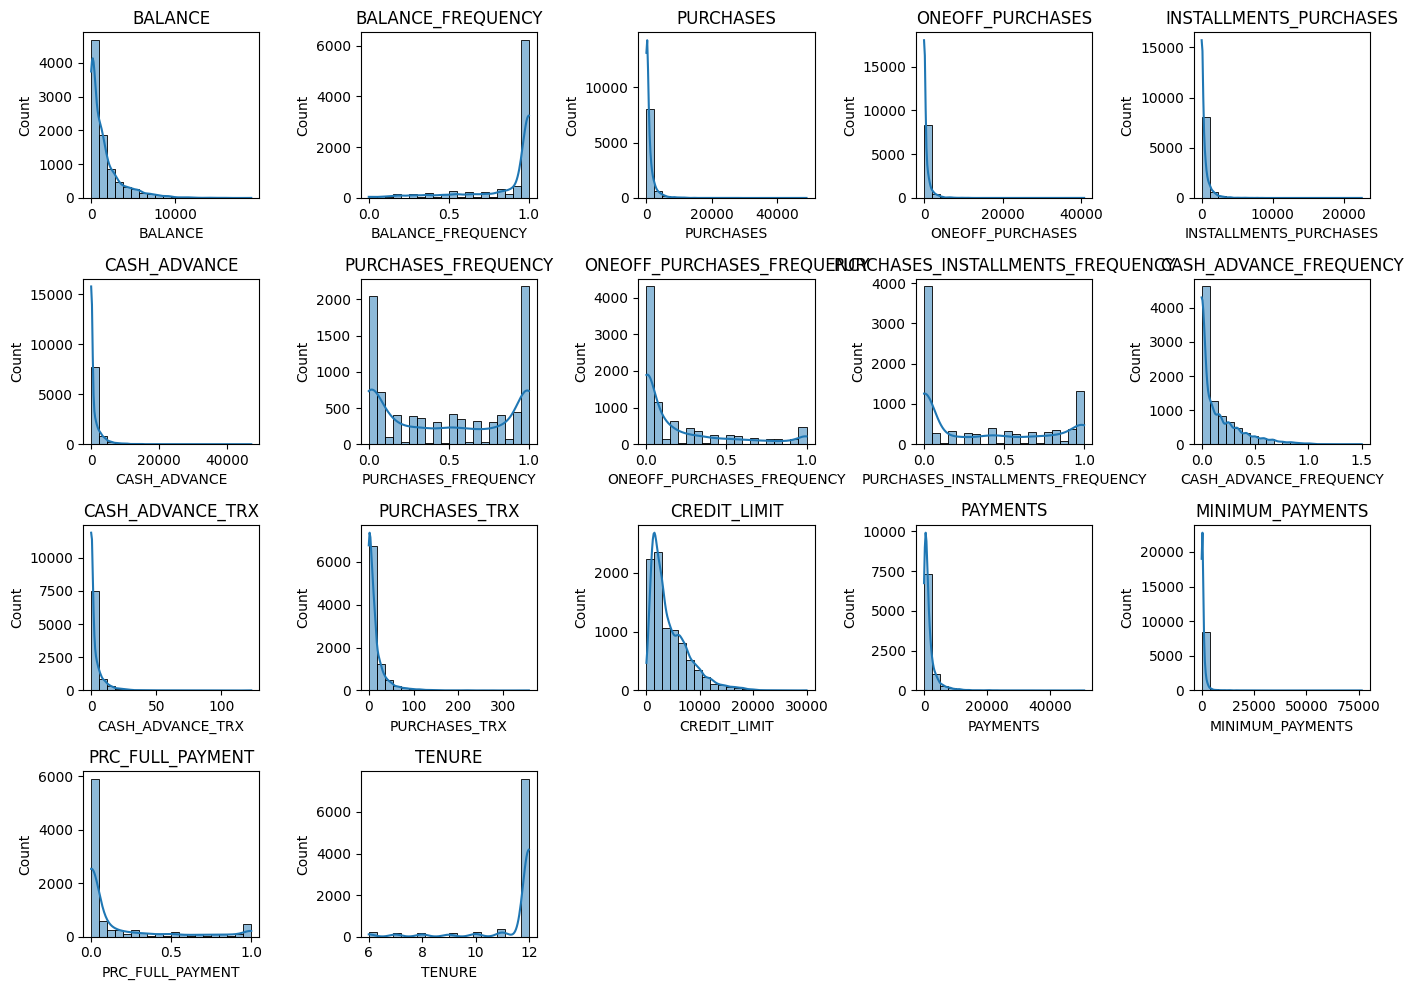

In [20]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

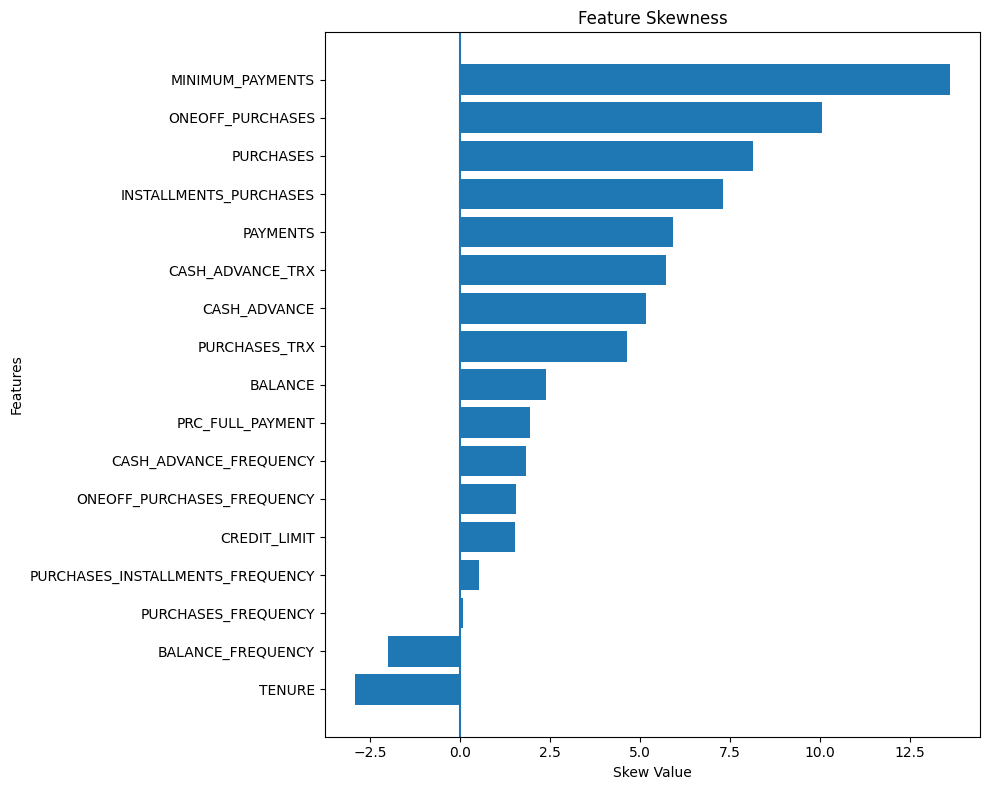

In [24]:
skew_vals = df.skew().sort_values()

plt.figure(figsize=(10, 8))
plt.barh(skew_vals.index, skew_vals.values)
plt.title("Feature Skewness")
plt.xlabel("Skew Value")
plt.ylabel("Features")
plt.axvline(0)
plt.tight_layout()
plt.show()

## EDA Summary and Conclusions

This dataset seems to be an interesting one to explore with K-means and PCA. We see there's almost 8900 valid rows in total, with mostly meaningful features, CUST_ID being the only one we cannot use. 

We also found that there's a few rows with null/invalid values, we can address that without trimming the dataset by filling them with median values, and we also found that there are no constant or near constant features that we need to drop. 

Some of the features are bound to small ranges like 0-1 and 0-10, others seem to have large ranges, which makes sense because they are dollar amounts. This means that we will need to do scaling to help PCA and K-means to perform better.

The two biggest cleanups will be addressing outliers and then adjusting the skew. K-means is very sensitive to both of these problems, because they affect our capacity to find the right centroid positions.

Correlation analysis shows moderate relationships between several features (e.g., ONEOFF_PURCHASES and PURCHASES), but these pairs are not perfectly redundant. This multicollinearity supports the use of PCA to reduce dimensionality and extract uncorrelated components before clustering.

Overall, the dataset requires a bit of preprocessing, and the patterns observed during EDA are good indicators that we should apply PCA for dimensionality reduction and K-Means for cluster discovery.

## Cleanup

As we mentioned in the EDA section, we need to take care of a couple of things:

- Drop CUST_ID (already done).
- Address null values in MINUMUM_PAYMENTS and CREDIT_LIMIT
- Clean up outliers
- Fix the extreme skew on some of the features
- Scale features

PCA is extremely sensitive to scale and variance, skew produces components dominated by long tail variables, and outliers distort the covariance structure.

### Fill out missing values

In [30]:
df_clean = df.copy()

# We will fill out missing values with median values
df_clean.isnull().sum()
df_clean = df_clean.fillna(df_clean.median())

In [29]:
print("Missing values before:", df.isnull().sum().sum())
print("Missing values after:", df_clean.isnull().sum().sum())

Missing values before: 314
Missing values after: 0


### Clean up outliers

We will clean up 1st and 99th percentiles

In [33]:
columns = df_clean.columns
for col in columns:
    lower = df_clean[col].quantile(0.01)
    upper = df_clean[col].quantile(0.99)
    df_clean[col] = df_clean[col].clip(lower, upper)

print("Count of values cleaned by feature:")
(df_clean[columns] != df[columns]).sum()

Count of values cleaned by feature:


BALANCE                             180
BALANCE_FREQUENCY                    80
PURCHASES                            90
ONEOFF_PURCHASES                     90
INSTALLMENTS_PURCHASES               90
CASH_ADVANCE                         90
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY               77
CASH_ADVANCE_TRX                     89
PURCHASES_TRX                        90
CREDIT_LIMIT                        111
PAYMENTS                             90
MINIMUM_PAYMENTS                    493
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

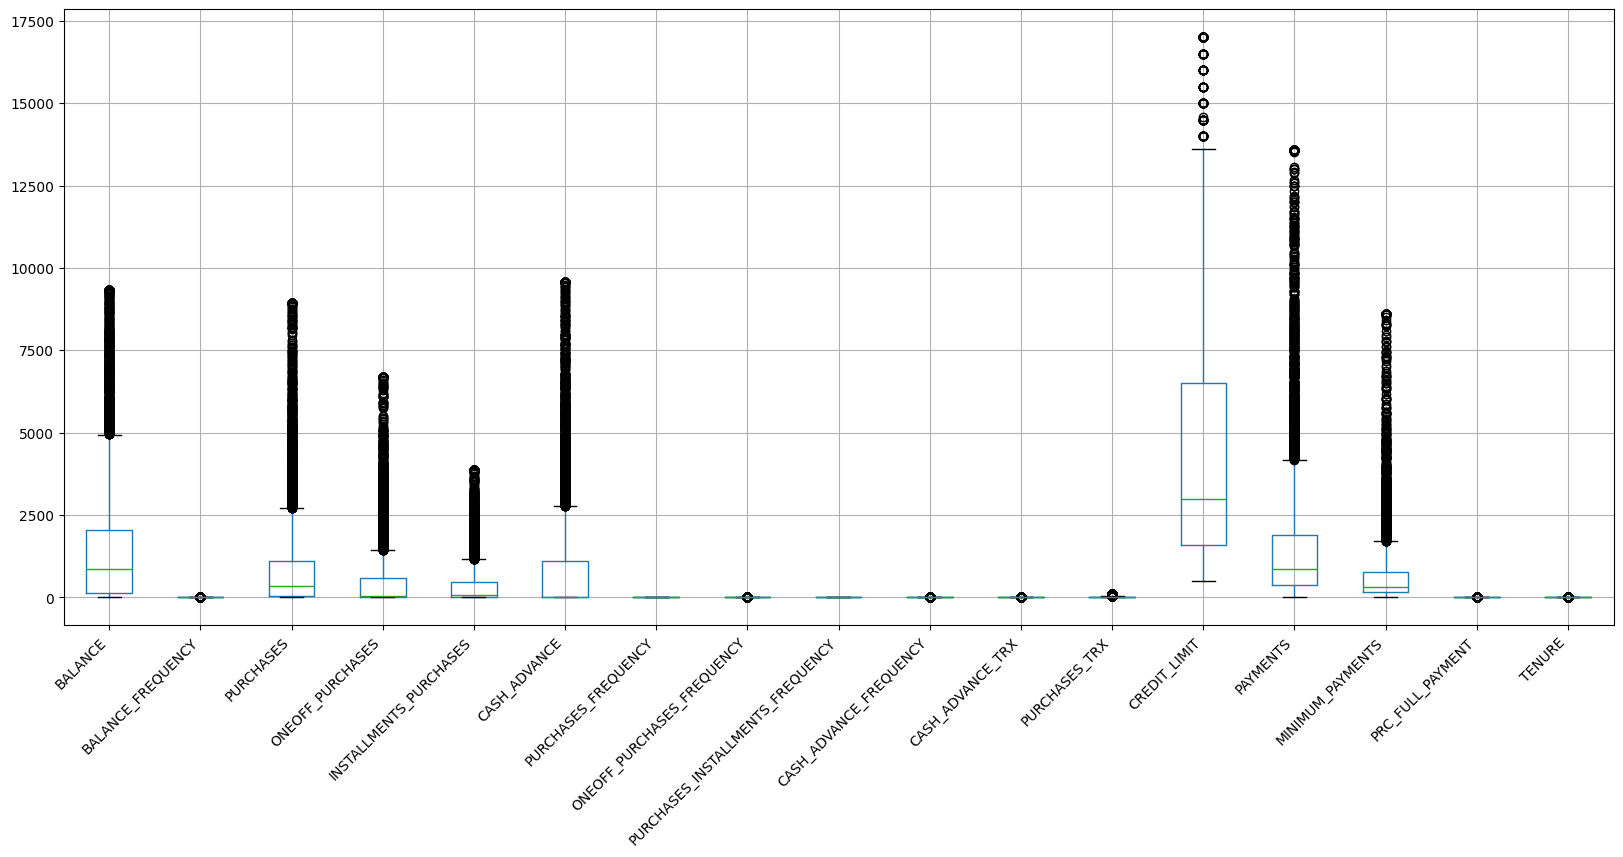

In [34]:
df_clean.boxplot(figsize=(20,8))
_ = plt.xticks(rotation=45, ha="right")

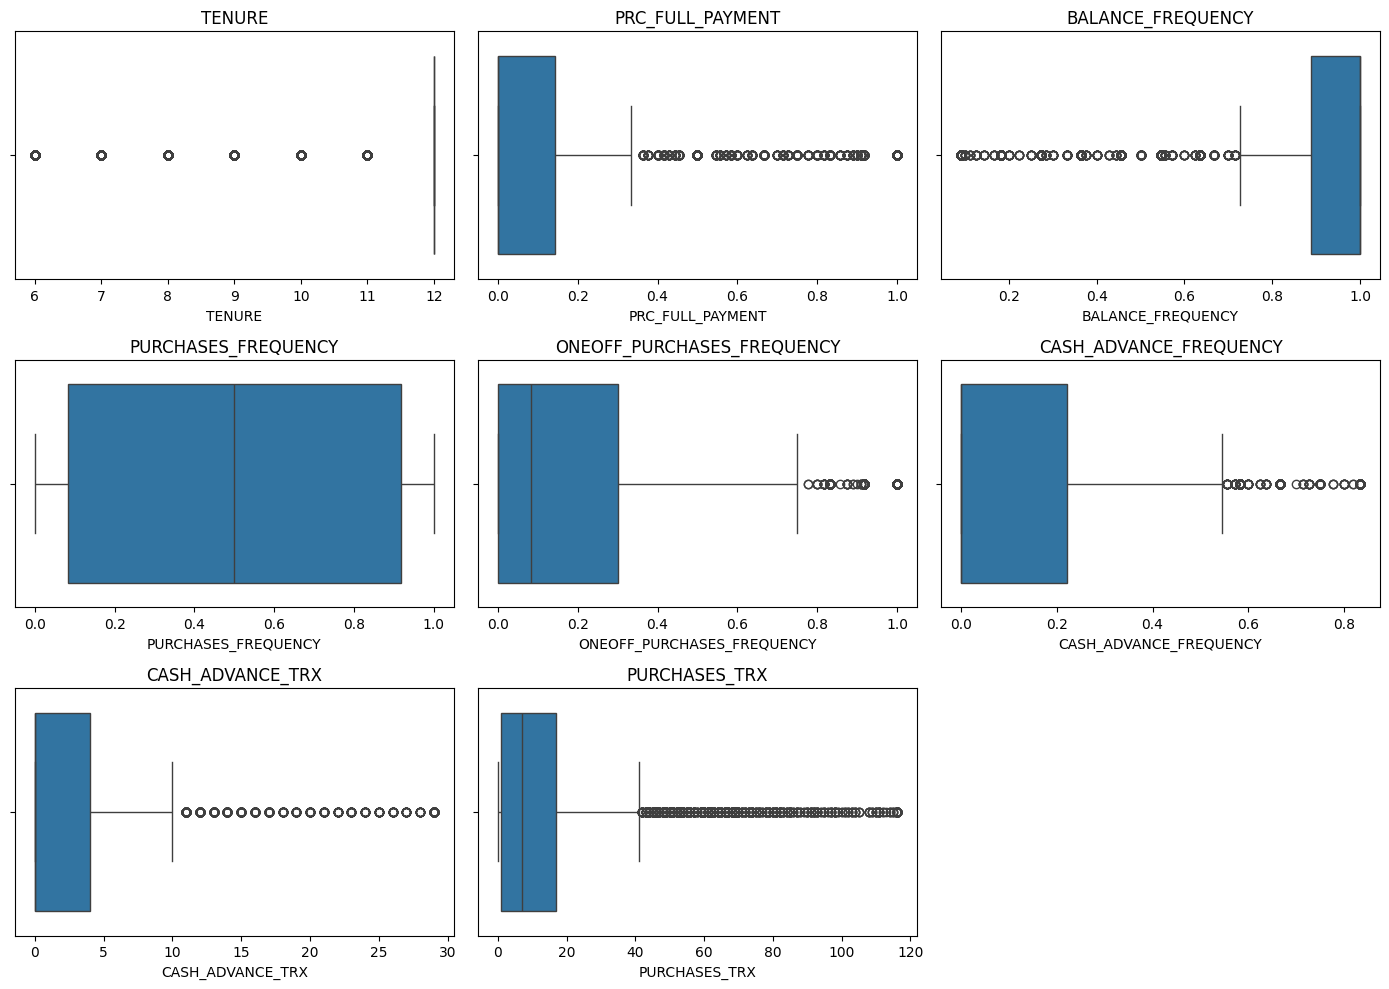

In [36]:
small_cols = [
    'TENURE', 
    'PRC_FULL_PAYMENT', 
    'BALANCE_FREQUENCY',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX'
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(small_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_clean[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Fix Skew

We can apply a log1p transformation only to columns with high right skew.

Log1p has a couple of benefits:
- Handles zeros safely
- Reduces heavy tails
- Plays well with PCA + K-means

In [37]:
skew_vals = df_clean.skew()
skewed_cols = skew_vals[skew_vals > 1].index.tolist()

skewed_cols

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [38]:
df_clean[skewed_cols] = df_clean[skewed_cols].apply(lambda x: np.log1p(x))

In [39]:
df_clean.skew()

BALANCE                            -0.864559
BALANCE_FREQUENCY                  -1.977332
PURCHASES                          -0.777428
ONEOFF_PURCHASES                    0.176113
INSTALLMENTS_PURCHASES             -0.033567
CASH_ADVANCE                        0.258503
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.290617
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.384136
CASH_ADVANCE_TRX                    0.884052
PURCHASES_TRX                      -0.000158
CREDIT_LIMIT                       -0.057175
PAYMENTS                           -1.833525
MINIMUM_PAYMENTS                    0.356626
PRC_FULL_PAYMENT                    1.746046
TENURE                             -2.943017
dtype: float64

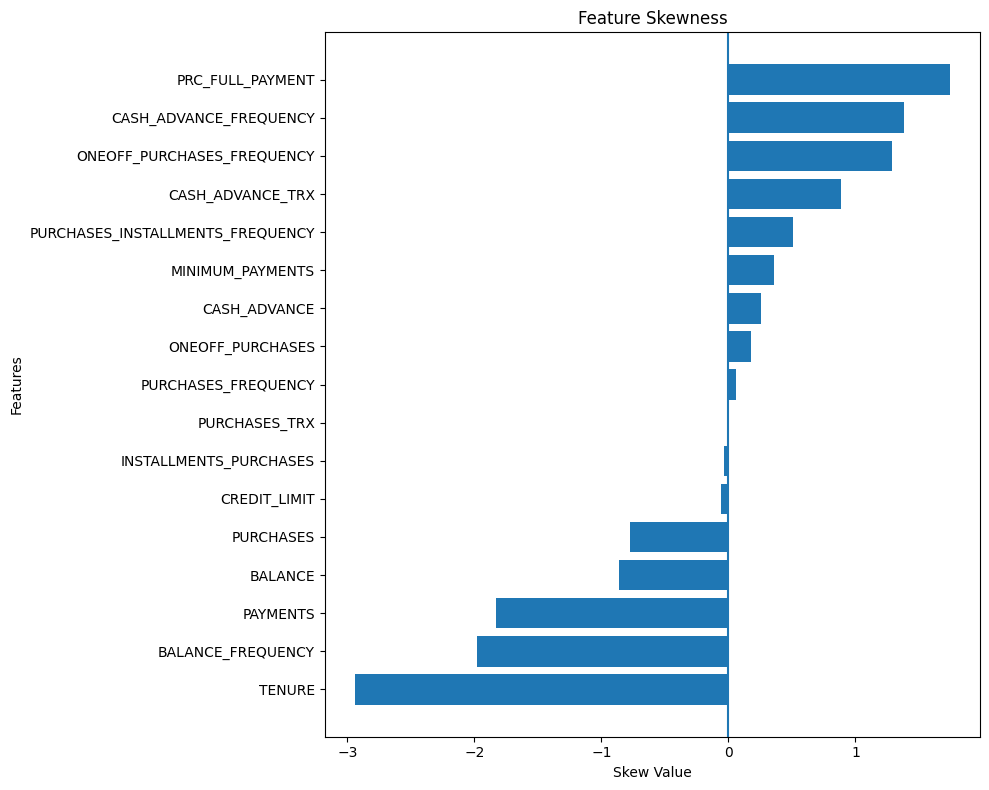

In [40]:
skew_vals = df_clean.skew().sort_values()

plt.figure(figsize=(10, 8))
plt.barh(skew_vals.index, skew_vals.values)
plt.title("Feature Skewness")
plt.xlabel("Skew Value")
plt.ylabel("Features")
plt.axvline(0)
plt.tight_layout()
plt.show()

### Feature scaling

We need to scale the features if we want to apply PCA and K-means, sklearn's StandardScaler should be good enough for now

In [44]:
from sklearn.preprocessing import StandardScaler
columns = df_clean.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[columns])

df_scaled = pd.DataFrame(X_scaled, columns=columns)

In [45]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.207593,-0.255968,-0.112255,-0.988354,0.396845,-0.931271,-0.806490,-0.732480,-0.707313,-0.730135,-0.815244,-0.580369,-1.463907,-0.826310,-0.863731,-0.556368,0.36068
1,0.952095,0.132501,-1.682459,-0.988354,-1.088685,1.532009,-1.221758,-0.732480,-0.916995,0.712589,0.797080,-1.384751,0.934568,1.073586,0.942737,0.391958,0.36068
2,0.827850,0.520970,0.603774,1.066478,-1.088685,-0.931271,1.269843,2.466762,-0.916995,-0.730135,-0.815244,0.493253,1.019633,-0.117252,0.466933,-0.556368,0.36068
3,0.626995,-1.032906,0.831108,1.270802,-1.088685,0.566119,-1.014125,-0.363042,-0.916995,-0.212624,-0.120854,-0.877243,1.019633,-4.182156,-0.151163,-0.556368,0.36068
4,0.272691,0.520970,-0.708678,-0.113135,-1.088685,-0.931271,-1.014125,-0.363042,-0.916995,-0.730135,-0.815244,-0.877243,-1.239289,-0.062633,-0.366898,-0.556368,0.36068


In [47]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

## Cleanup Summary

We started by filling out missing values with the mean for those columns, this resulted in 314 corrections in total.

Then we cleaned up outliers by clipping the 1st and 99th percentiles. The features that were affected by this the most were MINIMUM_PAYMENTS, CREDIT_LIMIT, and BALANCE, with 493, 111, 180 clippings respectively.
Other columns had 90 values clipped, and only a few, like TENURE and PRC_FULL_PAYMENT had 0.

To fix the data skew, we applied log1p transformations, we did this because we needed to solve the extreme right skew before applying PCA and K-means. The results for this were validated in table form but we also created a bar chart and we can see that features like MINIMUM_PAYMENTS that had a massive skew of 13.6 are now at 0.35, a massive improvement.

Finally we used Sklearn's standard scaler to level out our features because we had some features in the 0-1 range and some were just very high dollar amounts. This ensured that our PCA covariance will get an equal contribution from each of the features, and also that the K-means distance calculations are going to be correct

## PCA

We'll import sklearn's PCA module and fit our scaled data first. 

Then we'll plot the explained variance ratio to figure out the shape of the curve and also which number of components explains most of the variance, this will be our cutoff.

Finally we'll plot a 2 component PCA and explore the shape and clustering.

In [49]:
from sklearn.decomposition import PCA

X = df_scaled.values

pca = PCA()
pca.fit(X)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


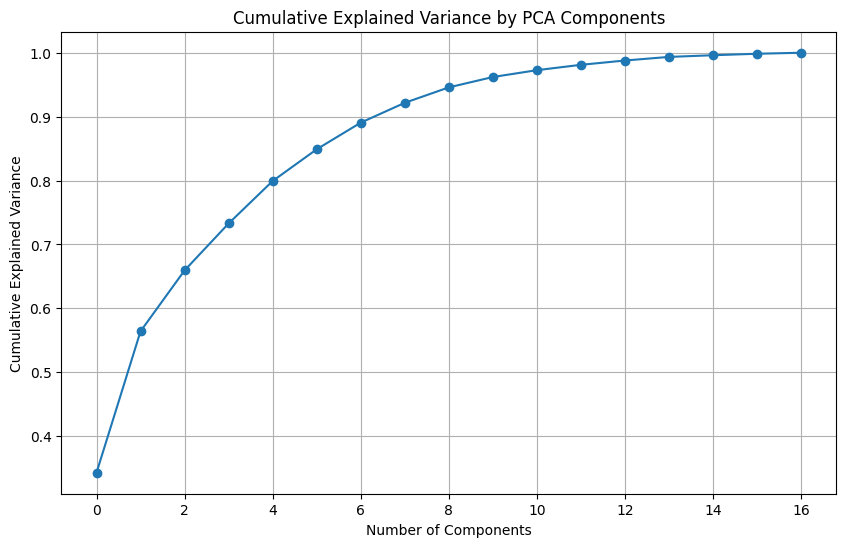

In [50]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Looking at the chart, we can notice that most of the variance (over 90%) is explained by 8 features

In [51]:
explained_variance = pca.explained_variance_ratio_

pca_var_df = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance)+1),
    'ExplainedVarianceRatio': explained_variance,
    'CumulativeVariance': np.cumsum(explained_variance)
})

pca_var_df.head(10)

,Component,ExplainedVarianceRatio,CumulativeVariance
0,1,0.342654,0.342654
1,2,0.221353,0.564007
2,3,0.095299,0.659305
3,4,0.073443,0.732748
4,5,0.066443,0.799192
5,6,0.049644,0.848836
6,7,0.041700,0.890536
7,8,0.031039,0.921575
8,9,0.024166,0.945741
9,10,0.016215,0.961956


In [52]:
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X)

In [53]:
pca_8 = PCA(n_components=8)
X_pca8 = pca_8.fit_transform(X)

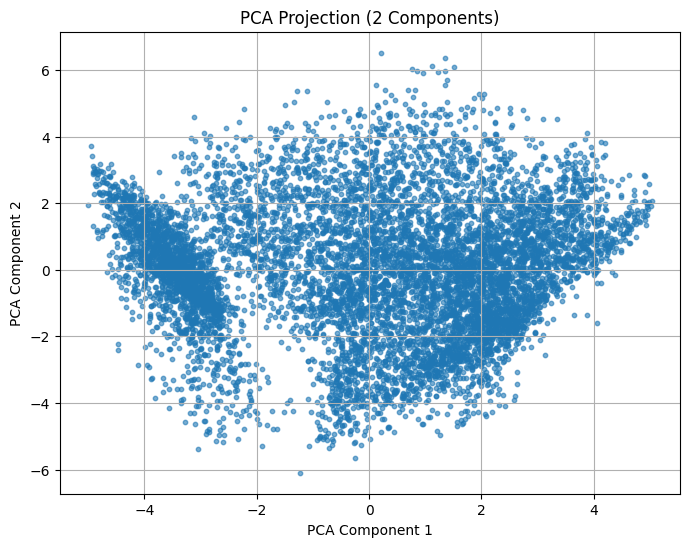

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], s=10, alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection (2 Components)")
plt.grid(True)
plt.show()

### PCA Summary

After computing principal components and plotting them, we can observe that over 90% of the variance is explained by 8 components. This will be our cutoff.

The plot also shows a smooth curve with no sharp moves, this means that the variance is well spread across the dimensions. Based on a bit of research, it seems to be a common thing in consumer/financial data.

Picking all the components after 8 as well would only explain less than 8% of our variance, the diminishing returns are very visible, and since or goal with PCA is dimensionality reduction without losing much information, we can skip them.

Finally, the 2 component scatter plot looks good. It doesn't show any obvious clusters, which indicates continuous variation. It also has a triangular/funnel shaped distribution, which means that the features are correlated and constrained. This all indicated that PCA is working correctly.

## Model Building: K-Means+PCA vs K-means on the original scaled data vs Hierarchical Clustering+PCA

For comparison purposes, we'll build two different K-means models, one on the original (scaled) data, and the other one on PCA reduced data (8 components).
For comparison, we'll also try out Hierarchical clustering with the PCA reduced data.

We'll produce elbow plots, score plots, and some additional visualizations to help us compare.

In [56]:
# we already have the 8 component PCA in X_pca8 from the previous section
# getting the values of the original scaled data

X_full = df_scaled.values 

Computing inertia for k = 2 to 12 clusters

In [57]:
from sklearn.cluster import KMeans

Ks = range(2, 13)
inertia_full = []
inertia_pca = []

for k in Ks:
    km_full = KMeans(n_clusters=k, random_state=42)
    km_full.fit(X_full)
    inertia_full.append(km_full.inertia_)

    km_pca = KMeans(n_clusters=k, random_state=42)
    km_pca.fit(X_pca8)
    inertia_pca.append(km_pca.inertia_)

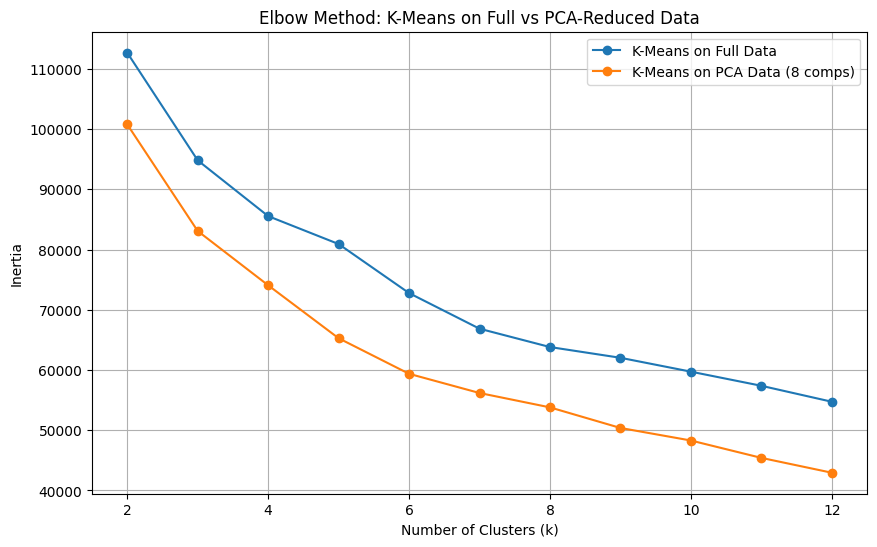

In [58]:
plt.figure(figsize=(10,6))
plt.plot(Ks, inertia_full, marker='o', label='K-Means on Full Data')
plt.plot(Ks, inertia_pca, marker='o', label='K-Means on PCA Data (8 comps)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: K-Means on Full vs PCA-Reduced Data')
plt.legend()
plt.grid(True)
plt.show()

Let's also compute and plot Silhouette Scores

In [59]:
from sklearn.metrics import silhouette_score

sil_full = []
sil_pca = []

for k in Ks:
    km_full = KMeans(n_clusters=k, random_state=42).fit(X_full)
    labels_full = km_full.labels_
    sil_full.append(silhouette_score(X_full, labels_full))

    km_pca = KMeans(n_clusters=k, random_state=42).fit(X_pca8)
    labels_pca = km_pca.labels_
    sil_pca.append(silhouette_score(X_pca8, labels_pca))

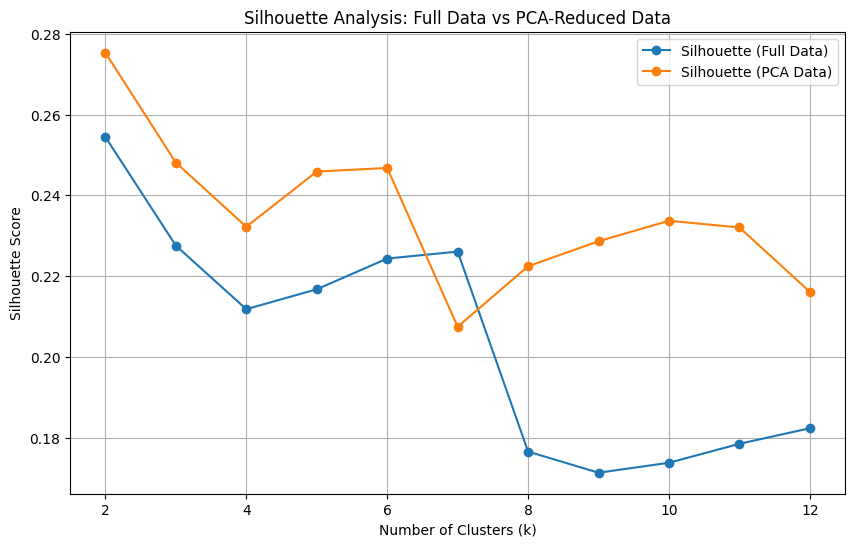

In [60]:
plt.figure(figsize=(10,6))
plt.plot(Ks, sil_full, marker='o', label='Silhouette (Full Data)')
plt.plot(Ks, sil_pca, marker='o', label='Silhouette (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis: Full Data vs PCA-Reduced Data')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

In the elbow method, we don't really need to look at the values, but what matters is the shape of the curves. We can see that the PCA adjusted curve is smoother and seems to decline more quickly. This method indicated that the sweet spot is between 4 and 6, but it's not immediately obvious

The silhouette method helps us measure cluster quality, not just inertia. The differences between the two tests are much more evident here, and we can tell that the sweet spot for the PCA adjusted data is around 5-6 clusters, and for the non-PCA data around 6-8. Both o them decline after those values and seem to even become unstable.

One more thing: both tests have their highest points at k=2, which is correct in indicating that the scores are better at just k=2, but the purposes of this final project, we'll go with the second best options.

### Final fit for models

We'll go with k=6, since it seems to be a good spot for both

In [61]:
k = 6

km_full_final = KMeans(n_clusters=k, random_state=42).fit(X_full)
labels_full = km_full_final.labels_

km_pca_final = KMeans(n_clusters=k, random_state=42).fit(X_pca8)
labels_pca = km_pca_final.labels_

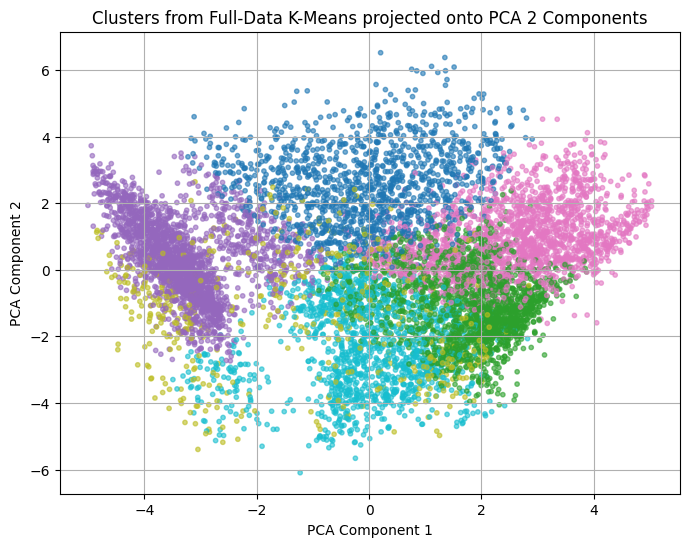

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_full, cmap='tab10', s=10, alpha=0.6)
plt.title("Clusters from Full-Data K-Means projected onto PCA 2 Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

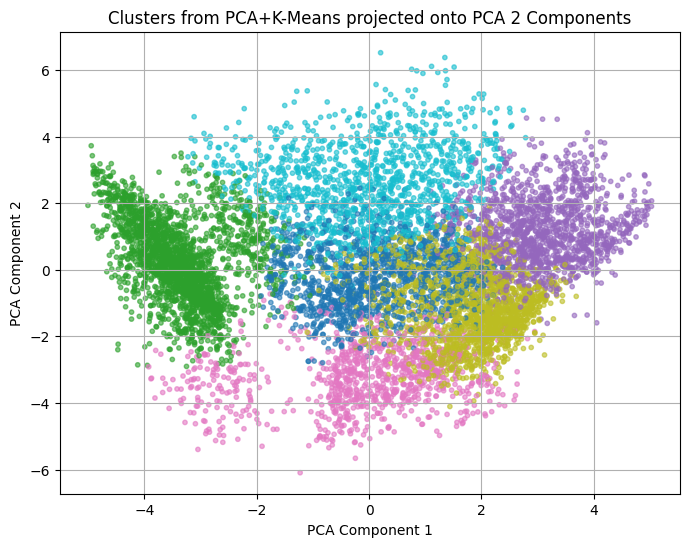

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_pca, cmap='tab10', s=10, alpha=0.6)
plt.title("Clusters from PCA+K-Means projected onto PCA 2 Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

### Making sense of the clusters

We can use the mean values of the original features within each group to identify behavioral patterns and their differences across clusters.

In [65]:
df_clusters = df_clean.copy()
df_clusters['cluster'] = labels_pca

cluster_profile = df_clusters.groupby('cluster').mean()
cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,6.492622,0.940171,5.977700,5.564785,1.507888,1.359607,0.363103,0.241209,0.077242,0.028679,0.242337,1.807170,7.927589,6.300035,5.879771,0.039539,11.613363
1,7.323459,0.932745,0.746601,0.607387,0.146628,6.963326,0.021067,0.013604,0.005495,0.244377,1.737429,0.156056,8.042701,6.720849,6.344445,0.027546,11.399470
2,6.530854,0.974026,7.759799,7.091503,6.071116,0.615396,0.919068,0.467688,0.682288,0.011046,0.097199,3.568821,8.649570,7.620385,5.858649,0.233351,11.894184
3,2.647514,0.347909,4.364803,2.206486,2.551950,1.201223,0.261581,0.058973,0.185037,0.022542,0.203551,1.249653,7.876269,5.005944,4.682912,0.152044,11.253452
4,4.912219,0.922325,6.123593,0.800695,6.066196,0.474062,0.832962,0.021356,0.790633,0.009247,0.081927,2.582420,7.697353,6.221833,5.437864,0.244124,11.454708
5,7.820014,0.975211,6.783875,4.973882,5.011900,7.457081,0.714277,0.246970,0.532733,0.295589,2.060031,2.810215,8.456828,7.491795,6.907986,0.033883,11.495955


### Third model for comparison: Hierarchical clustering

Applying Agglomerative Clustering to the PCA Reduced data for comparison, then plotting the same chart as the other two tests for comparison.

In [67]:
# Hierarchical Clustering (my notebook is broken and I can't seem to add a markdown

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=6,
    linkage='ward'
)

labels_hc = hc.fit_predict(X_pca8)

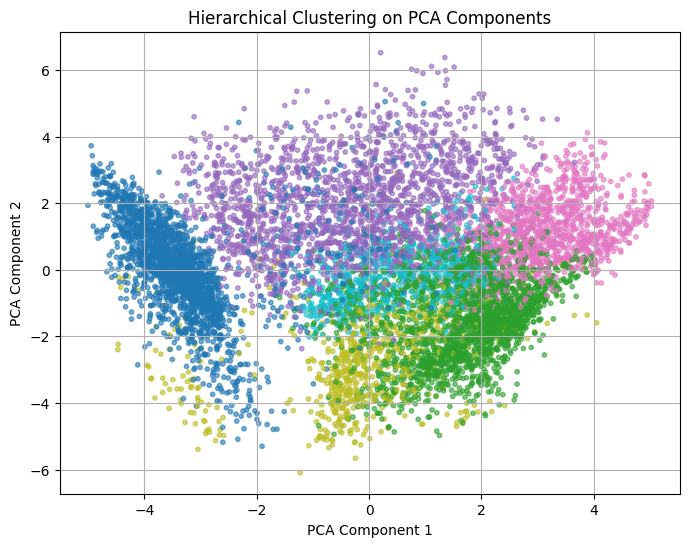

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_hc, cmap='tab10', s=10, alpha=0.6)
plt.title("Hierarchical Clustering on PCA Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

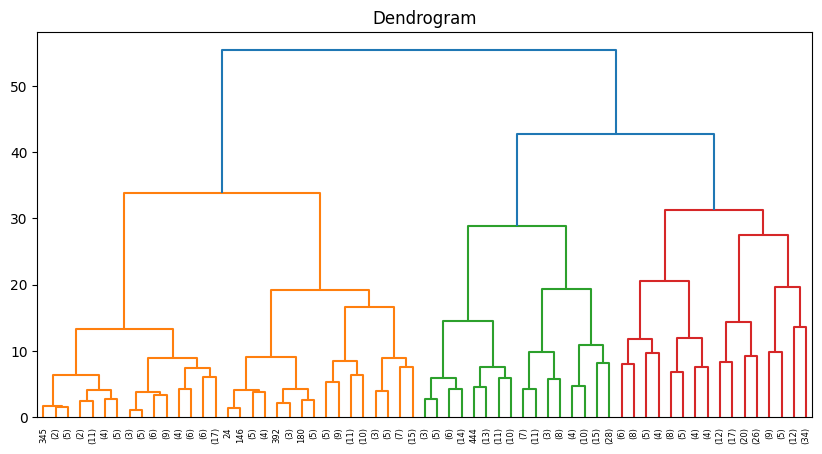

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

sample_idx = np.random.choice(len(X_pca8), size=500, replace=False)
Z = linkage(X_pca8[sample_idx], method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrogram")
plt.show()

# Interpretation of the model results and Project Conclusions

For this project I tried 3 different models:
- K-means on the original scaled dataset
- K-means on 8 component PCA reduced data
- Hierarchical Clustering on the PCA reduced data

I identified the sweet spot for the amount of clusters needed by calculating and plotting using the Elbow method and then Silhouette Analysis. There seemed to be a sweet spot between 6 and 8 features, so I stuck with 6 for the three models.
Then I generated 2D plots of the cluster assignment for the models and we could see significant differences between them.

#### Model 1: K-means on full data

The results for this model were not bad, but we could see that some clusters were interleaved in the plot. Some clusters looked very good, but some showed significant overlap. The fact that there's significant interleaving and overlap in some of these clusters indicates that these clusters may not reflect any meaningful behavioral structure.

#### Model 2: K-means on PCA reduced data

K-means applied to the PCA reduced dataset with 8 components explaining about 92% of the variance, the clusters made much more sense. In the plot we can see that they don't overlap as much and that there's no interleaved clusters

PCA helped decorrelate the features and it seems to have removed significant noise. This was the best of the three tests I ran and it was clearly visible.

#### Model 3: Hierarchical Clustering on PCA data

The results of the hierarchical clustering was very similar to the other two. Changing the method from ward to something else could have yielded different results but since we are only interested in comparing it to the others I didn't go that far in my analysis. Overall it seems to have performed better than K-means on the original scaled data, but worse than K-means+PCA.


### Interpretation of the six clusters based on K-means+PCA

Analyzing the cluster profile from before we can describe them as follows:

- Cluster 0: High one-off purchases, moderate spending, low cash advance
- Cluster 1: Extremely high cash advance, very low purchases
- Cluster 2: Highest purchases + frequency, high credit limit, low cash advance
- Cluster 3: Low balance, low frequency, moderate installment use
- Cluster 4: High installment purchases + frequency, low cash advance
- Cluster 5: High mixed purchases + extremely high cash advances

### Final Conclusion and takeaways

This dataset has been a great fit for K-means and hierarchical clustering, we did some significant cleanup but in general it seems to be solid on it's own. We compared K-means with and without PCA and were able to very visibly point out the different results. Adding Hierarchical Clustering for contrast gave us yet another great model to compare against.

Overall, this was a great project and it served as a great refresher for me (I took the course a few months ago and I'm just now finishing the final project).



#### References
- Dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
- Sklearn documentation
- Elbow Method vs. Silhouette Score: which is better? https://www.geeksforgeeks.org/machine-learning/elbow-method-vs-silhouette-score-which-is-better/